## IMPORT THE NECCESSARY LIBRARIES


In [ ]:
#We are going to import the neccessary libraries for the dataset
#These include Pandas,numpy, seaborn,matplotlib,norm and stats

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.impute import SimpleImputer


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier



## READ DATASET

In [ ]:
#we are going to read the data into the Data Frame.

In [392]:
data_frame = pd.read_csv('C:/Users/HP/Desktop/AirBnBPricing/airbnb-price_predict-main/datasets/AB_NYC_2019.csv')

## 1.DATA DISCOVERY


In [ ]:
# This refers to familiarising yourself with data such that you can conceptualise it

In [394]:
#1.1 Data Preparation
#The data preparation phase rearranges the data so that the visualization and analysis portion of 
#data discovery can run more smoothly.


In [395]:
#Checking to see how the dataset looks like
#Display the first five rows of the dataset
#This confirms the type of data frame in use

In [396]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [397]:
#Display twenty rows of the dataset randomly

In [398]:
data_frame.sample(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43022,33400953,Heart of NYC Full Home! 3Beds.2BR.2Bath. Kitchen.,3400827,Nicole,Manhattan,Upper West Side,40.79595,-73.97485,Entire home/apt,380,3,2,2019-04-21,0.74,1,0
42895,33310325,Flushing entire apartment in prime location,215556105,Kay,Queens,Flushing,40.76695,-73.81638,Entire home/apt,250,7,0,NaN,NaN,3,174
7138,5192165,Classic Harlem Brownstone - Manhattan,26856159,Glenda,Manhattan,Harlem,40.82306,-73.94688,Private room,63,1,209,2019-06-13,4.12,3,274
48110,36083269,"Serene Storefront Studio, a private cozy hideaway",3358348,Jennifer,Brooklyn,Crown Heights,40.67497,-73.94973,Entire home/apt,97,1,0,NaN,NaN,1,63
39037,30496236,Charming 1 BR on Gramercy (Min 30 Days),178224519,Lisa,Manhattan,Kips Bay,40.73932,-73.97997,Entire home/apt,155,30,0,NaN,NaN,8,363
20007,16014791,Clean style apt. Central midtwn near Javits,801883,CZ Casa,Manhattan,Hell's Kitchen,40.75536,-73.99950,Private room,110,1,188,2019-06-26,5.87,1,158
599,226021,Sunny 2 bedroom Williamsburg Duplex w/ 3 beds,815977,Ryan,Brooklyn,Williamsburg,40.71126,-73.94576,Entire home/apt,220,3,116,2019-06-30,1.23,2,135
16762,13392143,Astoria: 2 Weeks July 1st - 14th,39175915,Wesley,Queens,Ditmars Steinway,40.77643,-73.91364,Private room,29,14,0,NaN,NaN,1,0
31643,24653572,Staten Island retreat.,171590575,Anthony,Staten Island,Randall Manor,40.64160,-74.09861,Private room,50,10,2,2018-11-06,0.14,1,191
38375,30223426,Clean Room near M & R train. Close to mall & LGA,137358866,Kazuya,Queens,Elmhurst,40.73477,-73.87858,Private room,41,30,2,2019-05-28,0.76,103,268


In [399]:
#Display the last five rows of the dataset

In [799]:
data_frame.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## 2. SANITY DATA CHECK

In [800]:
#Checking for number of missig or null values 

In [801]:
data_frame.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [802]:
data_frame.isnull().sum()/len(data_frame)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [803]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [804]:
# Dislpaying the columns in the dataframe

In [805]:
data_frame.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [806]:
# Describing the Dataframe

In [807]:
data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [808]:
data_frame[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [809]:
df1 = data_frame[['id',
    #'name', 
    'host_id', 
    #'host_name',
    'neighbourhood_group',
       'neighbourhood', 
        #'latitude', 'longitude', 
    'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].copy()

In [810]:
df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [811]:
# Determining the shape of the dataset

In [812]:
df1.shape

(48895, 12)

In [813]:
df1.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [814]:
df1.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [815]:
# Renaming the columns

In [816]:
df1 = df1.rename(columns = {'id':'List_Id', 'host_id':'Host_Id', 'neighbourhood':'Neighbourhood', 
        'neighbourhood_group': 'Neighbourhood_Group',
        'room_type':'Room_Type', 'price':'Price_Dollars',
       'minimum_nights':'Minimum_Nights', 'number_of_reviews':'Number_Of_Reviews', 'last_review':'Last_Reviews',
       'reviews_per_month':'Reviews_Per_Month', 'calculated_host_listings_count':'Number_Of_Host_Listings',
       'availability_365':'Availability'})

In [817]:
df1.head()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [818]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
9106,6972534,21803081,Brooklyn,Williamsburg,Private room,55,7,2,2015-08-16,0.04,1,0
32245,25224320,4224480,Brooklyn,Bedford-Stuyvesant,Private room,85,2,34,2019-05-21,2.46,1,336
10443,7999409,9835167,Manhattan,Upper West Side,Shared room,65,2,7,2015-10-22,0.15,2,0
7748,5870127,54255,Brooklyn,Bedford-Stuyvesant,Entire home/apt,185,3,213,2019-06-22,4.14,3,298
6297,4603954,23718461,Brooklyn,Flatlands,Private room,85,2,0,NaN,NaN,1,365
14475,11377233,42626435,Brooklyn,Bedford-Stuyvesant,Private room,31,29,10,2017-05-28,0.25,1,0
23753,19182026,33439741,Brooklyn,Prospect Heights,Entire home/apt,125,1,9,2018-11-04,0.36,1,65
26997,21378053,120762452,Manhattan,Murray Hill,Entire home/apt,175,30,2,2019-01-19,0.11,50,365
42335,32848199,246910562,Brooklyn,Bay Ridge,Private room,53,1,22,2019-06-26,5.32,1,83
586,221097,1146744,Brooklyn,Greenpoint,Entire home/apt,116,29,22,2019-03-15,0.23,1,335


In [819]:
df1.tail()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,Private room,90,7,0,NaN,NaN,1,23


##Filling the Null value

In [820]:
#Checking for number of missig or null values 

In [821]:
df1.isnull()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,True,True,False,False


In [822]:
df1.loc[df1.duplicated(subset = ['Neighbourhood'])]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
10,5295,7702,Manhattan,Upper West Side,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,7989,Manhattan,Hell's Kitchen,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,11528,Manhattan,Upper West Side,Private room,85,2,113,2019-07-05,0.91,1,333
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,21207,Brooklyn,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


In [823]:
df1.isnull().sum()/len(df1)*100

List_Id                     0.000000
Host_Id                     0.000000
Neighbourhood_Group         0.000000
Neighbourhood               0.000000
Room_Type                   0.000000
Price_Dollars               0.000000
Minimum_Nights              0.000000
Number_Of_Reviews           0.000000
Last_Reviews               20.558339
Reviews_Per_Month          20.558339
Number_Of_Host_Listings     0.000000
Availability                0.000000
dtype: float64

In [824]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [825]:

# Fill missing values or drop columns with too many missing values



In [826]:
df1['Reviews_Per_Month'].fillna(0, inplace=True)
df1.drop(['Last_Reviews'], axis=1, inplace=True)



In [827]:
# Check for missing values

In [828]:
df1.isnull().sum()

List_Id                    0
Host_Id                    0
Neighbourhood_Group        0
Neighbourhood              0
Room_Type                  0
Price_Dollars              0
Minimum_Nights             0
Number_Of_Reviews          0
Reviews_Per_Month          0
Number_Of_Host_Listings    0
Availability               0
dtype: int64

In [829]:
print("There are {} missing Values in the Data".format(df1.isnull().sum().sum()))

There are 0 missing Values in the Data


In [830]:
# Checking for duplicate values

In [831]:
df1.loc[df1.duplicated()]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [832]:
df1.duplicated(subset = ['Neighbourhood'])

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

In [833]:
df1.query('Neighbourhood =="East Harlem"')

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,0.00,2,249
70,16974,65837,Manhattan,East Harlem,Entire home/apt,225,4,190,1.64,1,215
154,36647,157798,Manhattan,East Harlem,Private room,69,2,34,0.32,1,10
208,54860,258164,Manhattan,East Harlem,Private room,100,5,204,1.92,1,192
...,...,...,...,...,...,...,...,...,...,...,...
48818,36447795,274035866,Manhattan,East Harlem,Entire home/apt,110,2,0,0.00,1,25
48874,36477588,214535893,Manhattan,East Harlem,Private room,50,7,0,0.00,1,22
48875,36478343,274273284,Manhattan,East Harlem,Private room,140,1,0,0.00,1,180
48883,36482416,131529729,Manhattan,East Harlem,Private room,75,2,0,0.00,2,364


In [834]:
df1.dtypes

List_Id                      int64
Host_Id                      int64
Neighbourhood_Group         object
Neighbourhood               object
Room_Type                   object
Price_Dollars                int64
Minimum_Nights               int64
Number_Of_Reviews            int64
Reviews_Per_Month          float64
Number_Of_Host_Listings      int64
Availability                 int64
dtype: object

In [835]:
df1 = df1.loc[~df1.duplicated(subset = ['Neighbourhood','Room_Type','Minimum_Nights','Number_Of_Reviews'])]\
.reset_index(drop=True).copy()


In [836]:
# Checking for garbage

In [837]:
for i in df1.select_dtypes(include = "object").columns:
    print(df1[i].value_counts())
    print('***'*10)

Manhattan        9453
Brooklyn         9293
Queens           3803
Bronx             972
Staten Island     356
Name: Neighbourhood_Group, dtype: int64
******************************
Bedford-Stuyvesant    1212
Williamsburg          1119
Harlem                1006
Bushwick               780
Hell's Kitchen         755
                      ... 
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: Neighbourhood, Length: 221, dtype: int64
******************************
Entire home/apt    12331
Private room       10686
Shared room          860
Name: Room_Type, dtype: int64
******************************


In [838]:
#Checking for unique values

In [839]:
df1.nunique()

List_Id                    23877
Host_Id                    19525
Neighbourhood_Group            5
Neighbourhood                221
Room_Type                      3
Price_Dollars                515
Minimum_Nights               109
Number_Of_Reviews            394
Reviews_Per_Month            899
Number_Of_Host_Listings       43
Availability                 366
dtype: int64

In [840]:
df1.shape

(23877, 11)

In [841]:
# Describing the dataset

In [842]:
df1.describe()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
count,2.387700e+04,2.387700e+04,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,1.476919e+07,5.385410e+07,142.285756,7.950706,40.057419,1.440328,2.816099,125.751979
std,1.048182e+07,6.805600e+07,232.306408,27.374581,56.620952,1.775315,12.395368,130.967852
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.951402e+06,5.202854e+06,67.000000,2.000000,4.000000,0.170000,1.000000,0.000000
50%,1.400781e+07,2.246338e+07,100.000000,3.000000,17.000000,0.760000,1.000000,77.000000
75%,2.275209e+07,7.653684e+07,160.000000,5.000000,53.000000,2.210000,2.000000,249.000000
max,3.647575e+07,2.742256e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [843]:
# Histogram to understand the distribution

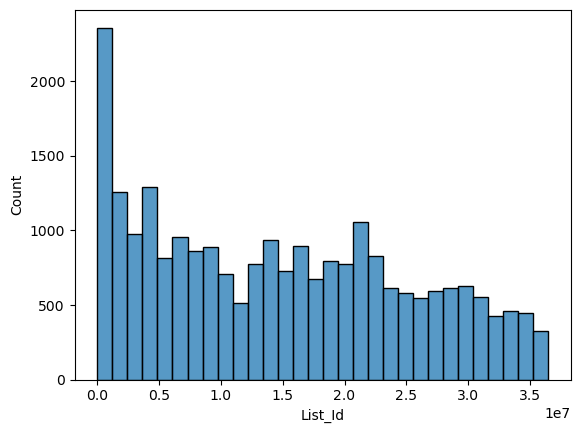

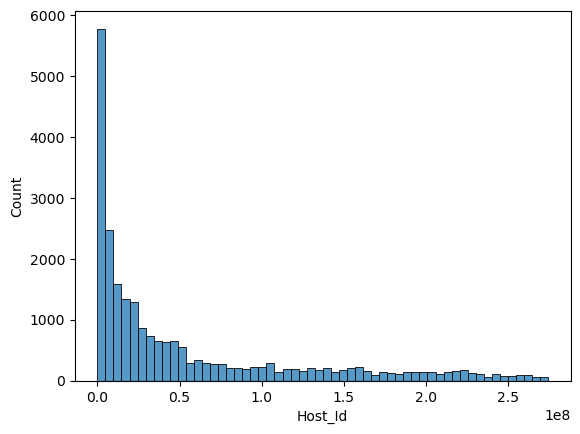

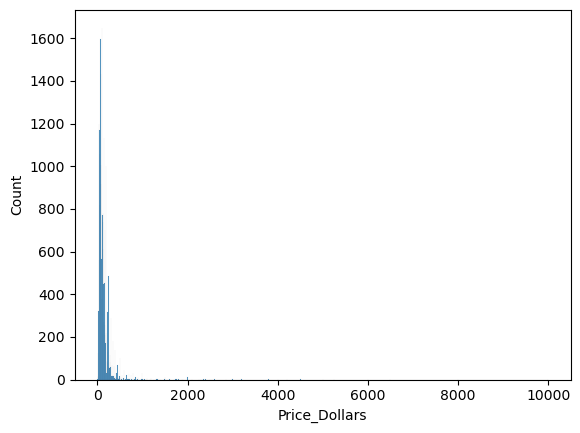

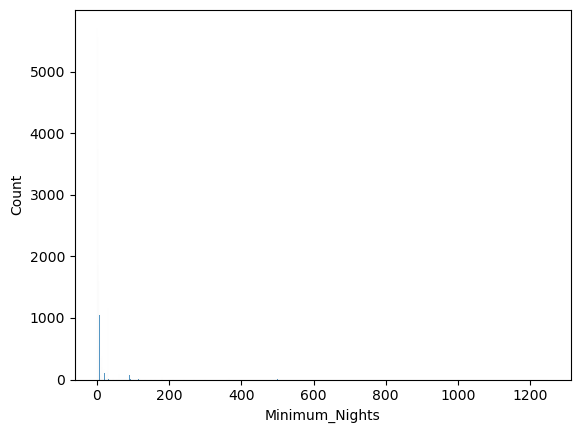

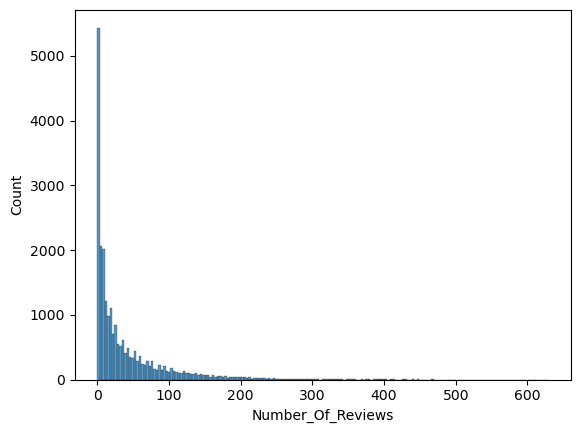

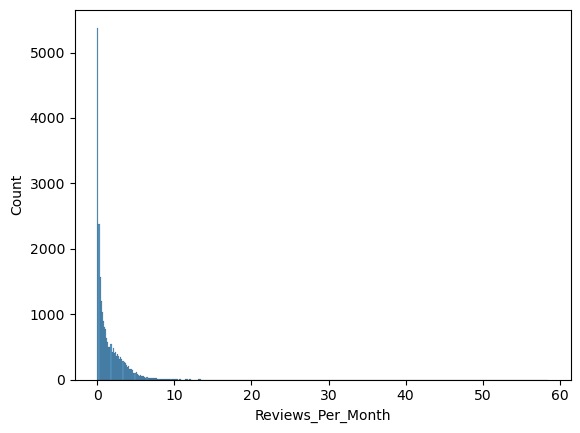

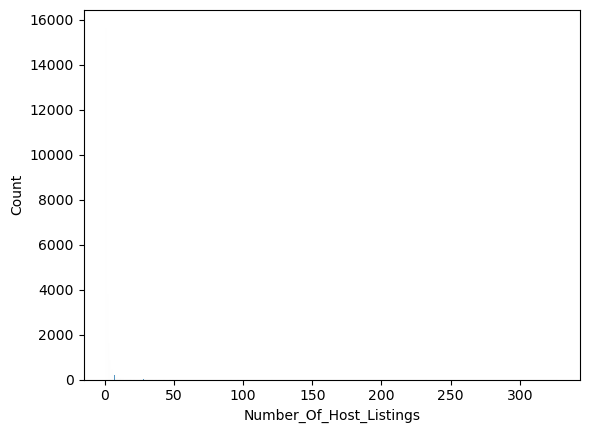

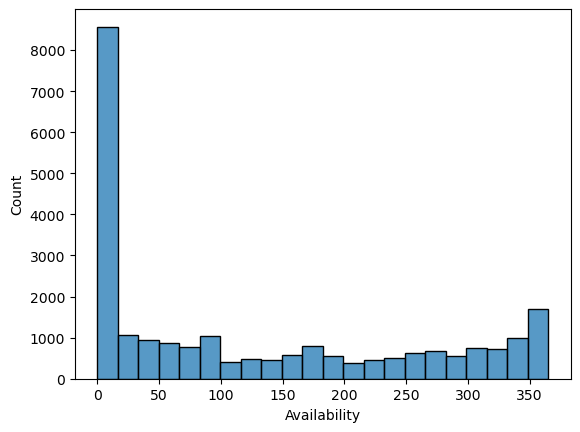

In [844]:
for i in df1.select_dtypes(include="number").columns:
     sns.histplot(data=df1,x=i)
     plt.show()

In [845]:
# BoxPlot to identify outliers

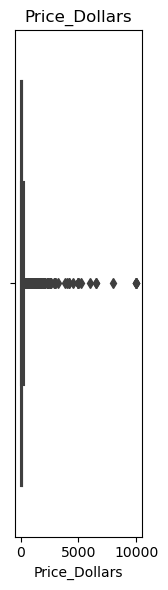

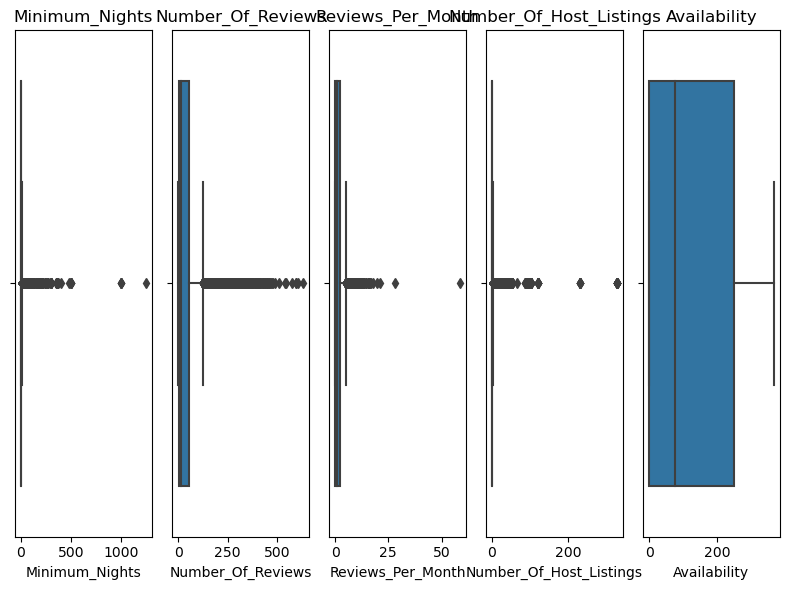

In [846]:
plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


In [847]:
# Outlier treatment

In [848]:
#Detection and removal of outliers using percentile

In [849]:
min_threshold,max_threshold=df1.Price_Dollars.quantile([0.001,0.999])
min_threshold,max_threshold

(16.0, 2631.0000000008586)

In [850]:
df1[df1.Price_Dollars<min_threshold]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
2747,1620248,2196224,Manhattan,East Village,Entire home/apt,10,30,0,0.00,4,137
13744,16620607,109725962,Brooklyn,Bushwick,Entire home/apt,11,2,113,3.86,1,261
13904,16927533,3737986,Manhattan,Financial District,Entire home/apt,12,300,0,0.00,1,0
14483,17979764,84497333,Manhattan,SoHo,Private room,10,5,2,0.07,1,0
14786,18490141,97001292,Queens,Jamaica,Entire home/apt,10,1,43,1.68,1,252
14982,18835820,52777892,Manhattan,Upper East Side,Entire home/apt,10,3,10,0.39,1,0
15400,19415314,47336995,Manhattan,Hell's Kitchen,Shared room,10,1,2,0.08,1,0
16016,20333471,131697576,Bronx,East Morrisania,Private room,0,2,55,2.56,4,127
16158,20608117,1641537,Brooklyn,Greenpoint,Private room,0,2,12,0.53,2,0
16171,20639792,86327101,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,4.37,6,232


In [851]:
df1[df1.Price_Dollars>max_threshold]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
932,363673,256239,Manhattan,Upper West Side,Private room,3000,7,0,0.00,1,365
1810,826690,4289240,Brooklyn,Prospect Heights,Entire home/apt,4000,4,0,0.00,1,83
2599,1448703,213266,Manhattan,Nolita,Entire home/apt,5000,1,2,0.03,1,365
3334,2110145,2151325,Manhattan,Upper West Side,Entire home/apt,6000,14,17,0.27,1,359
3473,2243699,1483320,Manhattan,Little Italy,Entire home/apt,5250,1,0,0.00,1,0
3508,2271504,11598359,Brooklyn,Clinton Hill,Entire home/apt,6500,1,0,0.00,1,0
3981,2919330,14908606,Brooklyn,Bedford-Stuyvesant,Private room,5000,6,10,0.16,1,363
4008,2952861,1177497,Brooklyn,Clinton Hill,Entire home/apt,4500,1,5,0.09,11,365
4009,2953058,1177497,Brooklyn,Clinton Hill,Entire home/apt,8000,1,1,0.03,11,365
5707,4737930,1235070,Manhattan,East Harlem,Entire home/apt,9999,5,1,0.02,1,0


In [852]:
df1= df1[(df1.Price_Dollars<max_threshold) & (df1.Price_Dollars>min_threshold)]
df1.shape

(23825, 11)

In [853]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
17904,22750161,156684502,Queens,Springfield Gardens,Private room,50,1,302,16.81,3,26
22169,31484603,5369840,Queens,Belle Harbor,Entire home/apt,105,2,0,0.00,1,22
4386,3435260,17315514,Brooklyn,Sunset Park,Private room,50,10,1,0.03,2,0
12042,14139651,19134246,Manhattan,Kips Bay,Entire home/apt,150,3,10,0.37,1,8
3783,2651125,320285,Manhattan,East Village,Entire home/apt,160,10,18,0.28,1,281
7788,7483853,33983182,Manhattan,Upper East Side,Private room,54,25,4,0.08,1,0
23363,34721719,261891944,Bronx,Fordham,Private room,75,1,1,1.00,1,363
3070,1924645,110958,Brooklyn,Williamsburg,Entire home/apt,120,14,29,0.43,1,0
11714,13743350,5490071,Manhattan,East Harlem,Entire home/apt,175,3,119,3.31,3,238
6519,5794806,257676,Brooklyn,Flatbush,Private room,148,1,11,0.22,2,90


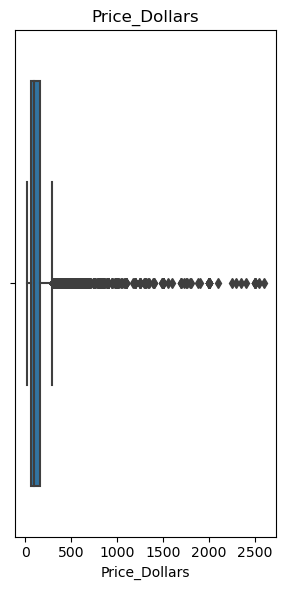

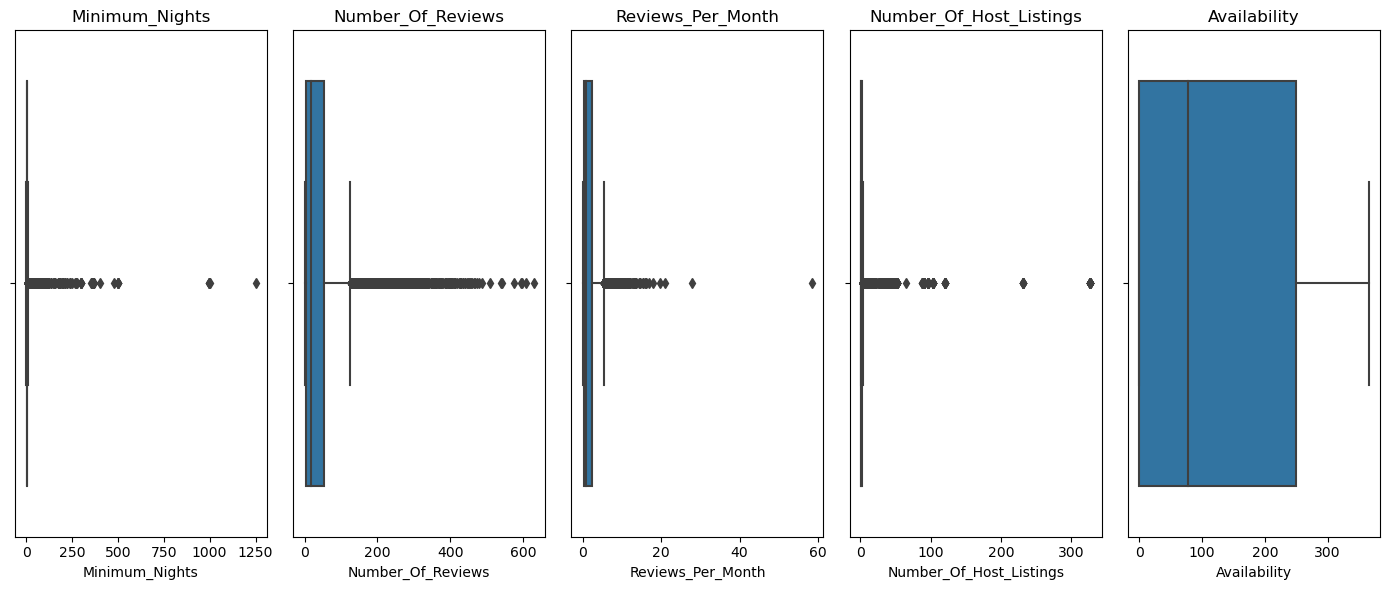

In [854]:



plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


In [855]:
# Scatterplot to understand the relationship of the data

In [856]:
df1.columns


Index(['List_Id', 'Host_Id', 'Neighbourhood_Group', 'Neighbourhood',
       'Room_Type', 'Price_Dollars', 'Minimum_Nights', 'Number_Of_Reviews',
       'Reviews_Per_Month', 'Number_Of_Host_Listings', 'Availability'],
      dtype='object')

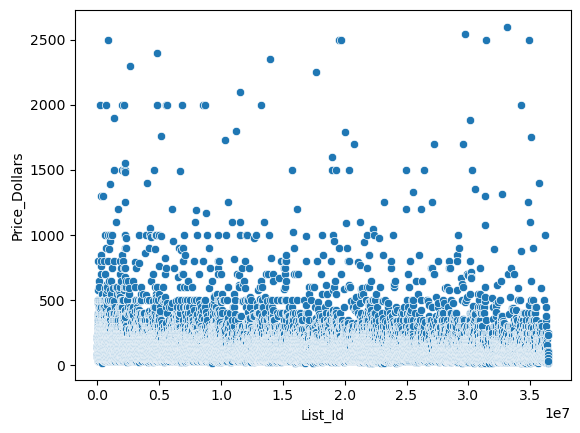

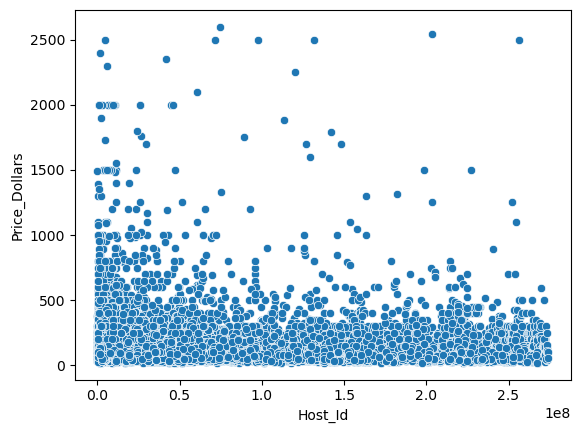

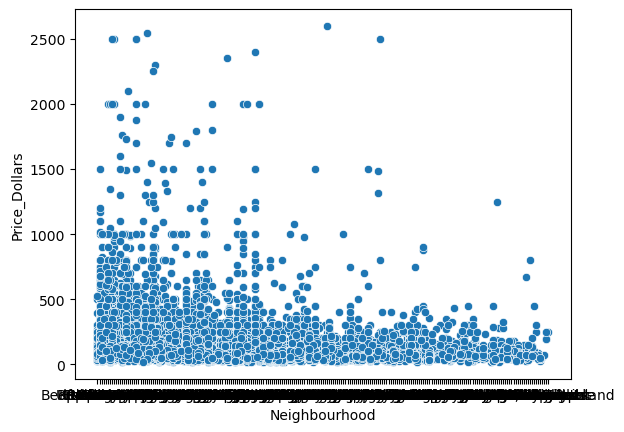

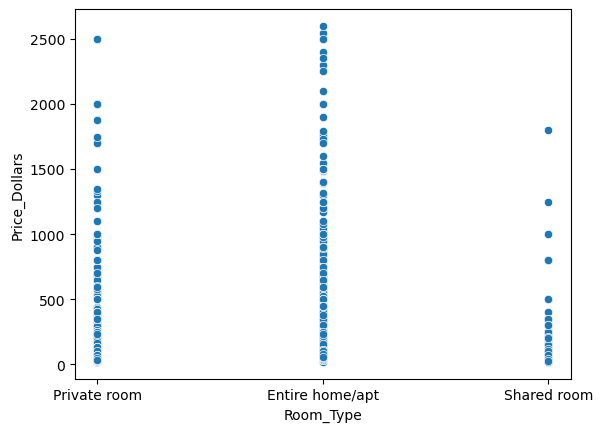

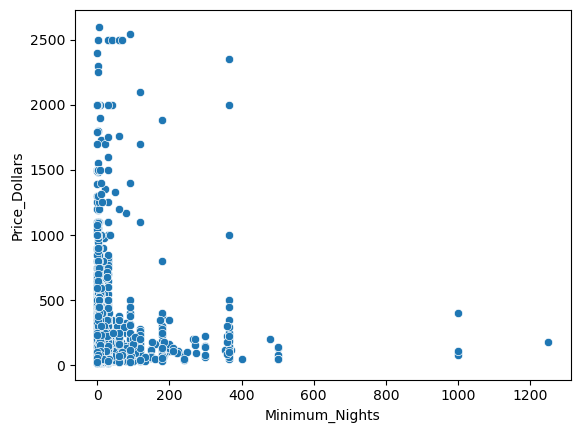

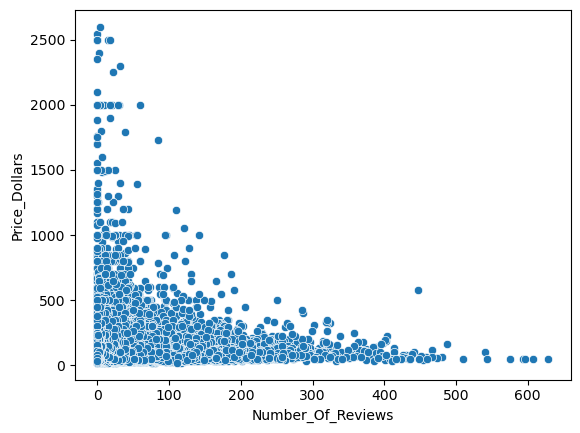

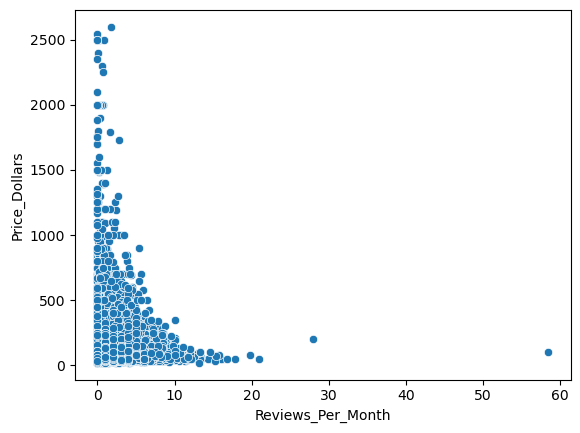

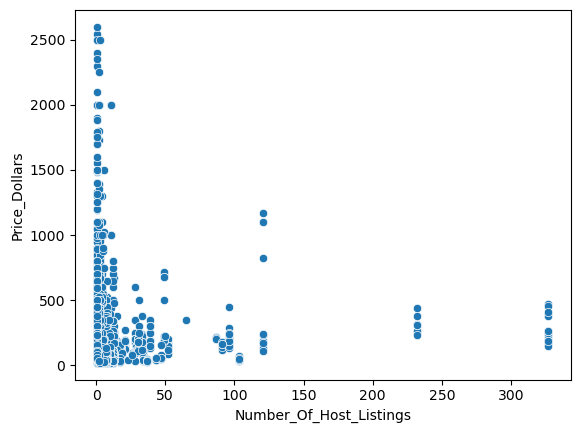

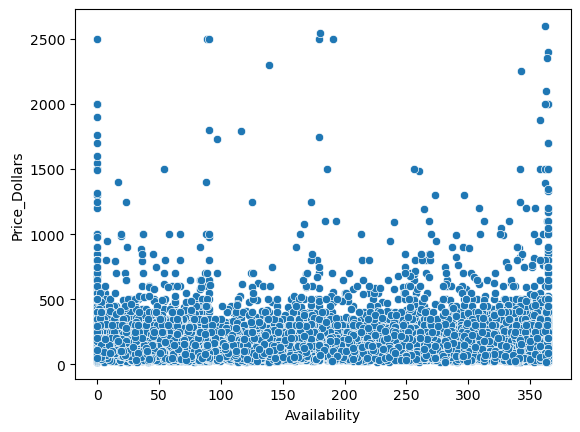

In [857]:
for i in ['List_Id', 'Host_Id', 'Neighbourhood', 'Room_Type', 
       'Minimum_Nights', 'Number_Of_Reviews', 'Reviews_Per_Month',
       'Number_Of_Host_Listings', 'Availability']:
     sns.scatterplot(data=df1,x=i,y='Price_Dollars')
     plt.show()

In [858]:
# Pie Chart showing room type distribution percentage

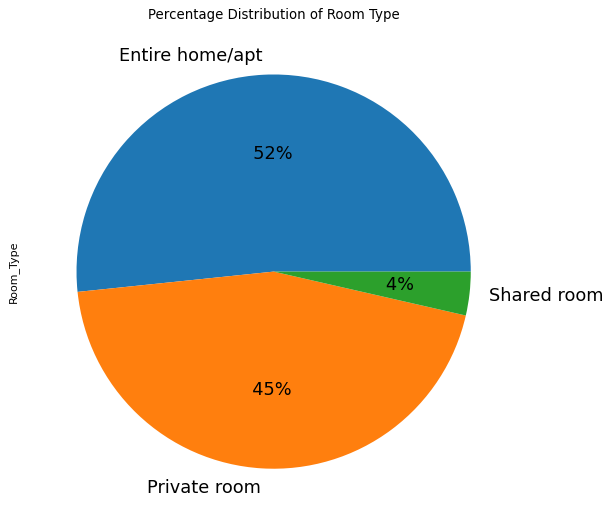

In [859]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Room_Type'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Room Type')
plt.show()

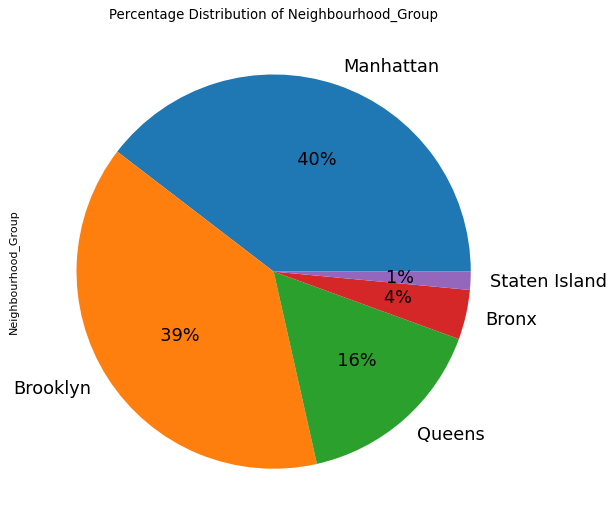

In [860]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Neighbourhood_Group'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Neighbourhood_Group')
plt.show()

In [861]:
# Histogram to understand the distribution of prices

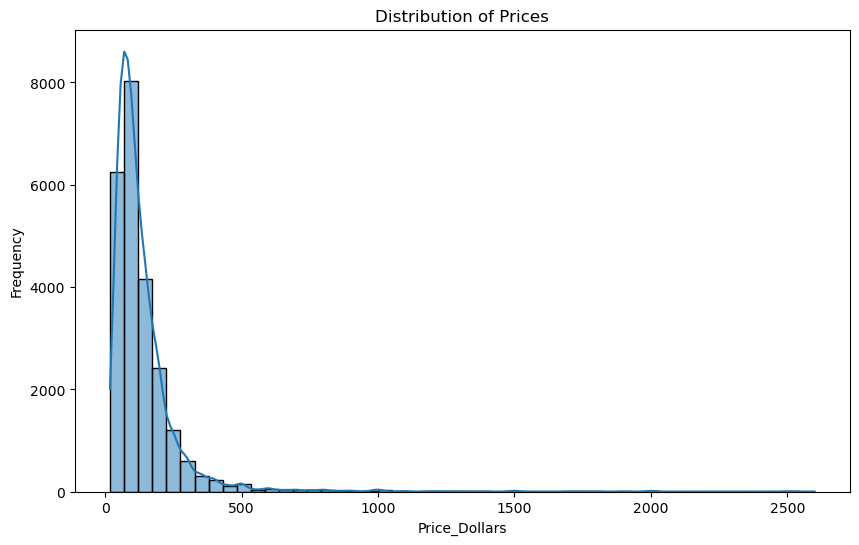

In [862]:

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price_Dollars'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price_Dollars')
plt.ylabel('Frequency')
plt.show()


In [863]:
print(f"Average of price per night : ${df1.Price_Dollars.mean():.2f}")
print(f"Maximum price per night : ${df1.Price_Dollars.max()}")
print(f"Minimum price per night : ${df1.Price_Dollars.min()}")

Average of price per night : $137.09
Maximum price per night : $2600
Minimum price per night : $18


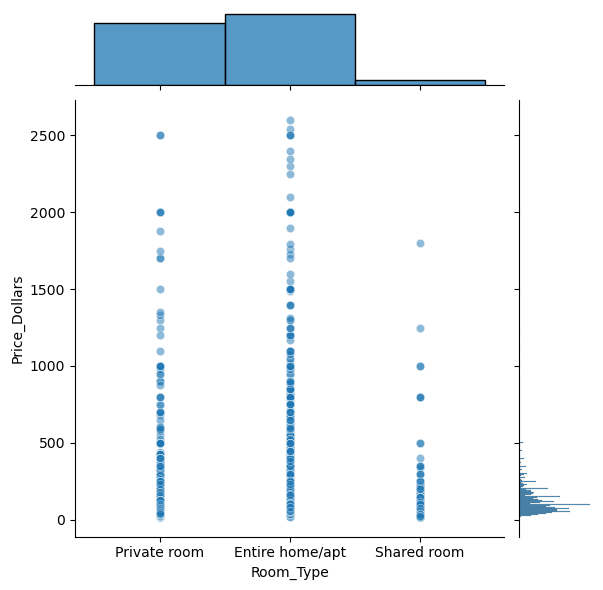

In [864]:
sns.jointplot(x ='Room_Type', y = 'Price_Dollars',data=df1,alpha=0.5)

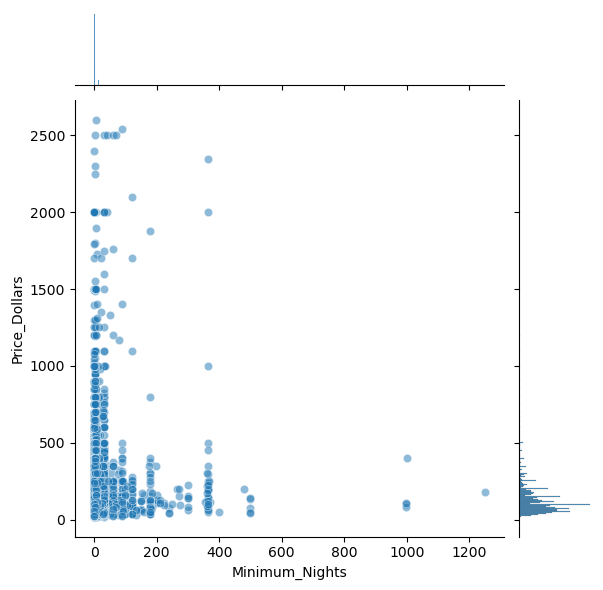

In [865]:
sns.jointplot(x ='Minimum_Nights', y = 'Price_Dollars',data=df1,alpha=0.5)

In [866]:
# Ploting a correlation matrix to interpret the relation and multicolinearity

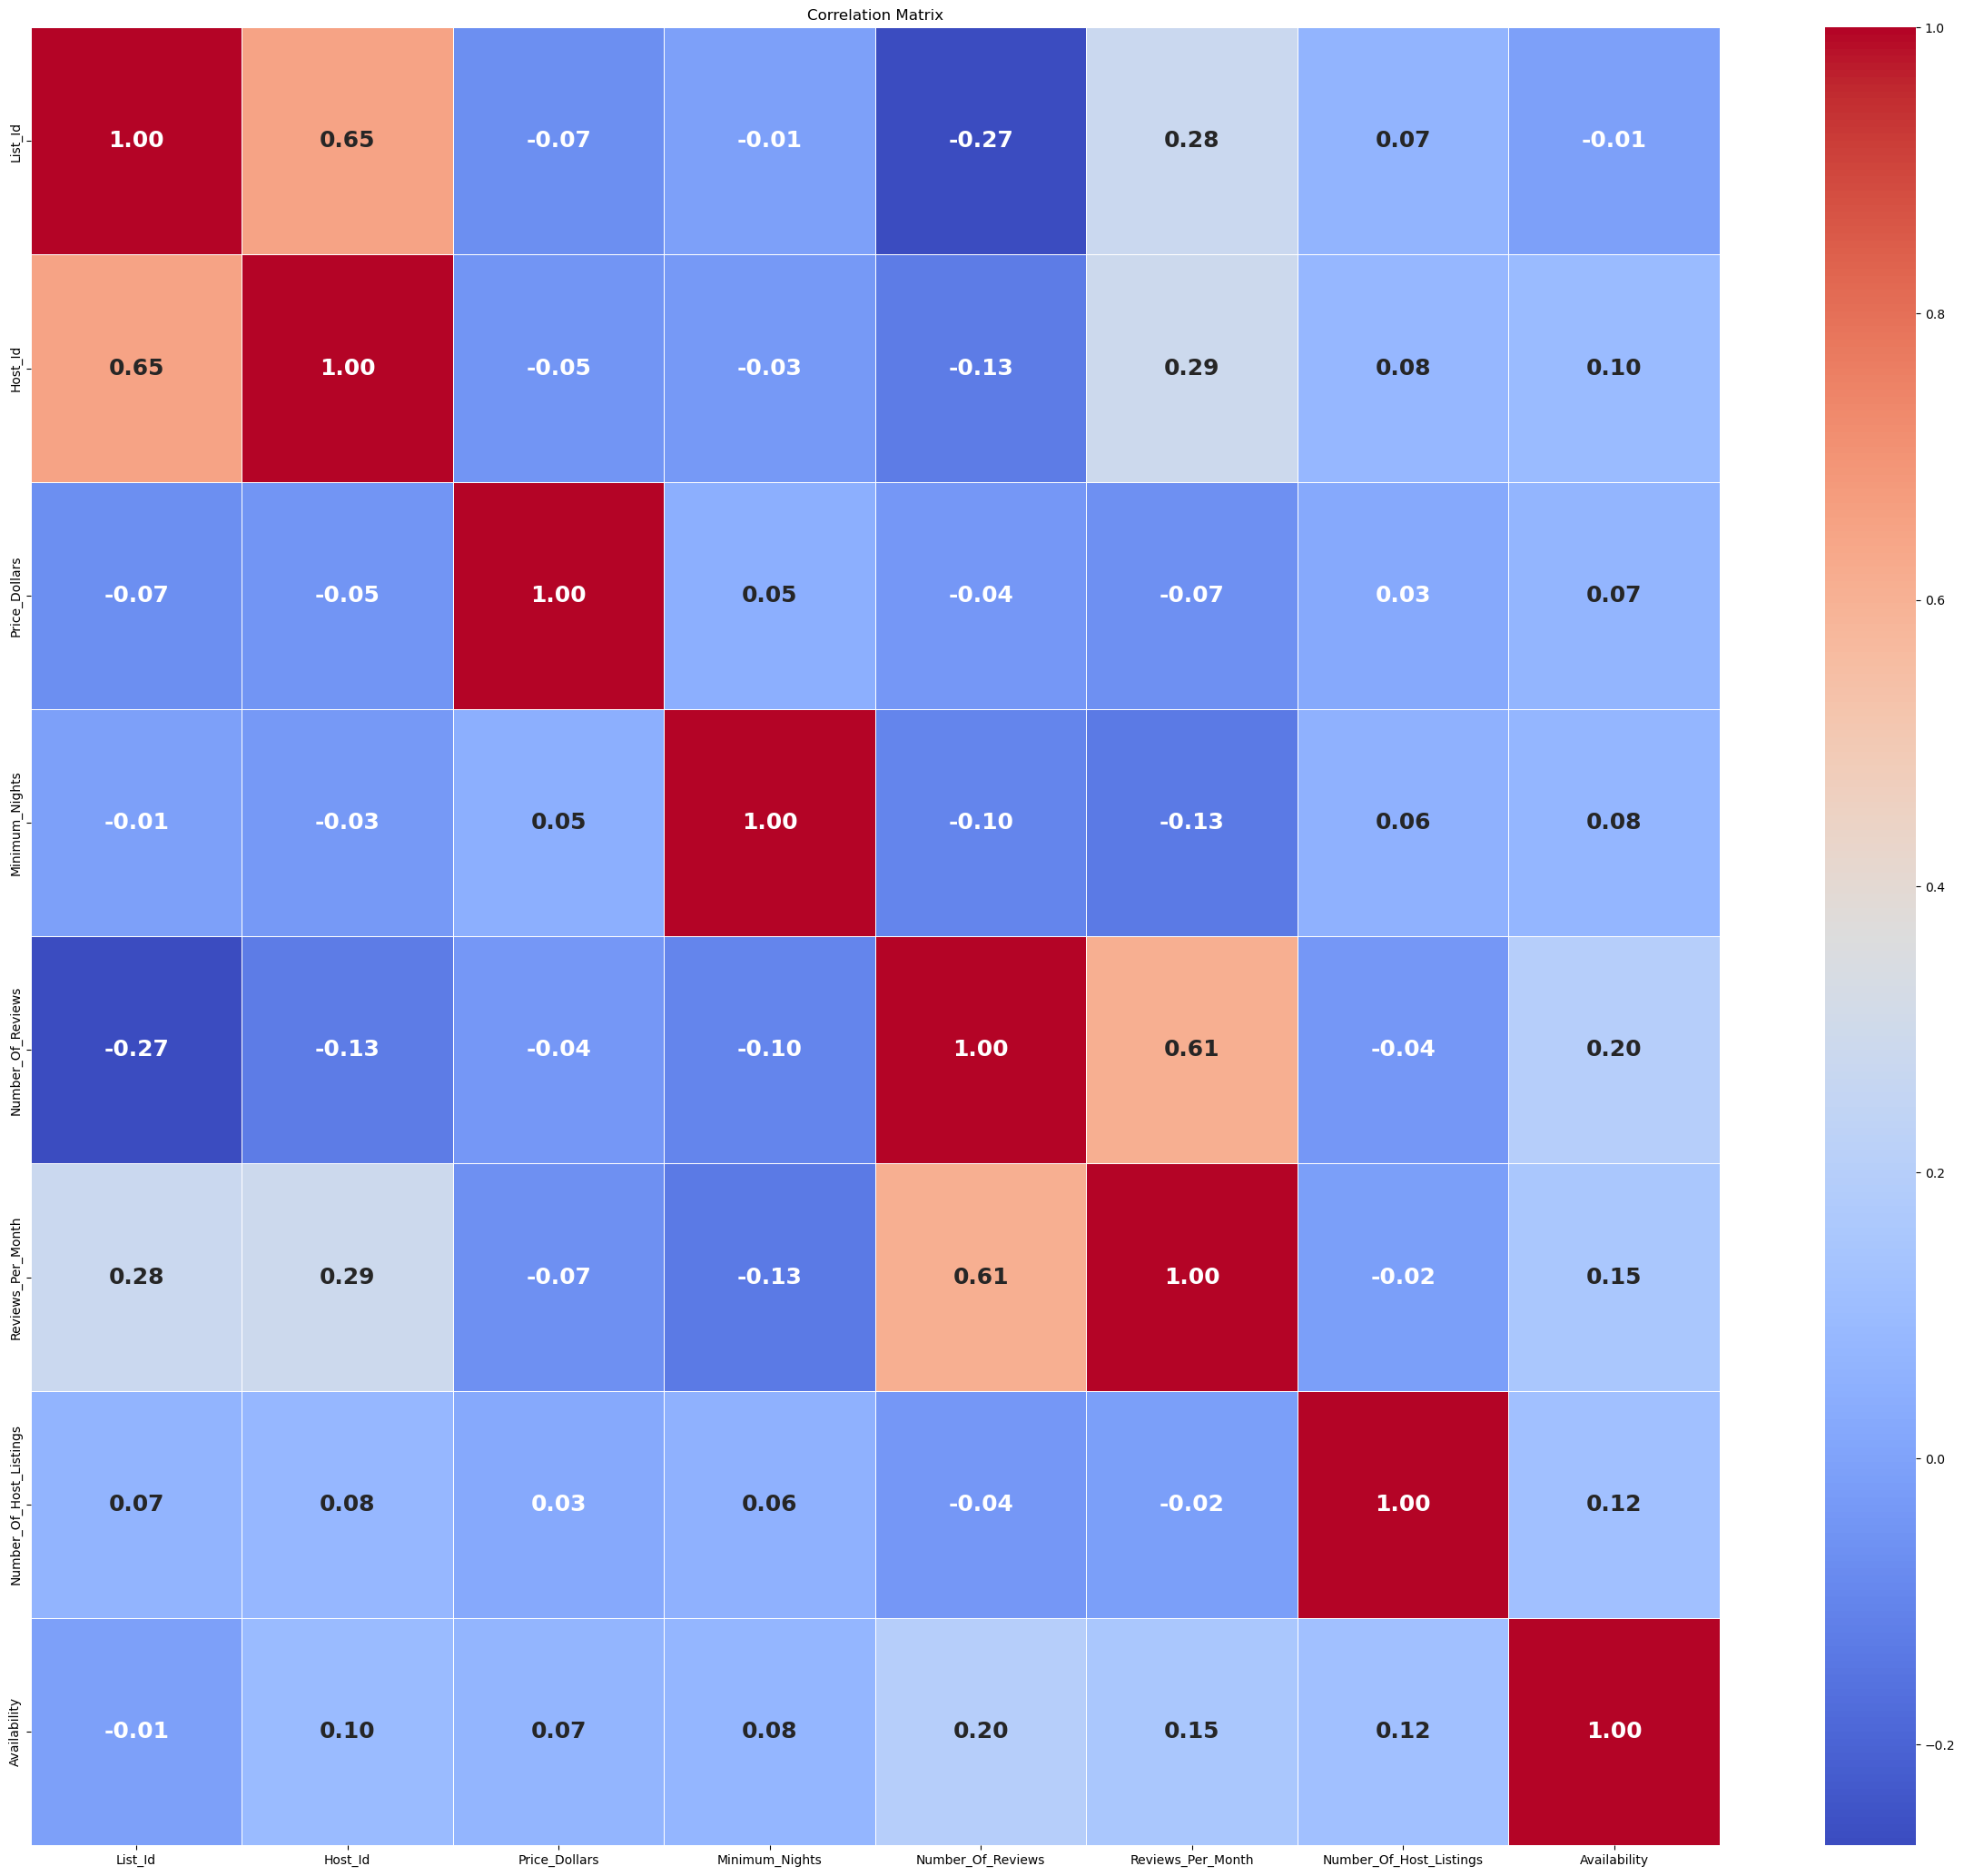

In [867]:
correlation_matrix = df1.corr()
plt.figure(figsize=(30, 26))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm',annot_kws={'fontsize':18, 'fontweight':'bold'})
plt.title('Correlation Matrix')
plt.show()


In [868]:
df1.select_dtypes(include="number").corr()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
List_Id,1.000000,0.647849,-0.067715,-0.012079,-0.270197,0.279721,0.066097,-0.010663
Host_Id,0.647849,1.000000,-0.048410,-0.034893,-0.130628,0.286156,0.081143,0.095884
Price_Dollars,-0.067715,-0.048410,1.000000,0.045039,-0.040089,-0.065762,0.026016,0.067336
Minimum_Nights,-0.012079,-0.034893,0.045039,1.000000,-0.101124,-0.132064,0.056765,0.075650
Number_Of_Reviews,-0.270197,-0.130628,-0.040089,-0.101124,1.000000,0.612481,-0.038703,0.198662
Reviews_Per_Month,0.279721,0.286156,-0.065762,-0.132064,0.612481,1.000000,-0.016515,0.153051
Number_Of_Host_Listings,0.066097,0.081143,0.026016,0.056765,-0.038703,-0.016515,1.000000,0.118186
Availability,-0.010663,0.095884,0.067336,0.075650,0.198662,0.153051,0.118186,1.000000


## FEATURE ENGINEERING

In [869]:
# Select Relevant features for the model

In [870]:
features = ['Minimum_Nights', 'Number_Of_Reviews', 'Reviews_Per_Month', 'Availability']
target = 'Price_Dollars'

df1 = df1.dropna(subset=features + [target])


In [871]:
# Creating features that will help with model development

In [872]:
df1['Price_Per_Night'] = df1['Price_Dollars']/df1['Minimum_Nights']

# LINEAR REGRESSION MODEL

In [873]:
# SPLITTING INTO TRAIN AND TEST

In [874]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [875]:
# MODEL TRAINING

In [876]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [877]:
# MODEL EVALUATION

In [878]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 20100.407970469318
Root Mean Squared Error: 141.77590758118714
Mean absolute Error: 76.4251287610071
R-squared: 0.011802299582462594


In [879]:
X_test

,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Availability
520,4,90,0.94,56
4824,1,401,6.76,178
2147,5,70,1.16,0
2816,3,146,2.08,277
52,3,82,0.70,140
...,...,...,...,...
17254,5,12,0.67,0
23417,70,0,0.00,191
2314,2,43,0.59,88
6821,3,40,2.80,18


In [880]:
y_test

520        99
4824      195
2147      160
2816      115
52        228
         ... 
17254      70
23417    2500
2314      117
6821      115
13667      75
Name: Price_Dollars, Length: 4765, dtype: int64

In [881]:
X_train

,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Availability
18977,2,18,1.33,38
15472,1,8,0.67,175
10564,2,138,3.63,268
17070,3,15,0.81,90
13390,3,17,1.16,334
...,...,...,...,...
21617,4,26,4.29,278
5402,2,219,3.88,35
860,2,61,0.86,90
15820,2,51,2.15,0


In [882]:
y_train

18977    215
15472     62
10564     59
17070     37
13390    400
        ... 
21617     90
5402      65
860      100
15820     69
23704    199
Name: Price_Dollars, Length: 19060, dtype: int64

In [883]:
# Implement Dynamic Pricing

In [884]:
df1['Pridicted_Price']= lr.predict(df1[features])
df1['Adjusted_Price']=df1['Pridicted_Price']*1.1
print("PREDICTED PRICE\n")
print(df1['Pridicted_Price'])
print("ADJUSTED PRICE")
print(df1['Adjusted_Price'])

PREDICTED PRICE

0        164.467147
1        161.806423
2        166.051237
3        119.861414
4        134.619633
            ...    
23872    141.874995
23873    165.622837
23874    147.975701
23875    163.460198
23876    140.478433
Name: Pridicted_Price, Length: 23825, dtype: float64
ADJUSTED PRICE
0        180.913862
1        177.987065
2        182.656361
3        131.847555
4        148.081597
            ...    
23872    156.062494
23873    182.185121
23874    162.773271
23875    179.806218
23876    154.526276
Name: Adjusted_Price, Length: 23825, dtype: float64


In [885]:
# MONITOR AND UPDATING THE MODEL

##  LOGISTIC REGRESSION

In [886]:
# Convert the problem into a classification Problem.

In [887]:
# Data preparation

In [888]:
# Create a binary target variable
median_price = df1['Price_Dollars'].median()
df1['Price_category'] = (df1['Price_Dollars'] > median_price).astype(int)

# Update features and target
y = df1['Price_category']


In [889]:
# MODEL TRAINING

In [ ]:

log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)


In [ ]:
# MODEL EVALUATION

In [ ]:

y_pred_log = log_mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


In [ ]:
#Analysising Residuals

In [ ]:
residuals = y_test-y_pred

In [ ]:
residuals

In [ ]:
sns.distplot(residuals,bins=10,kde=True)

## LASSO REGRESSION MODEL

In [ ]:
# MODEL TRAINING

In [ ]:
lasso_mod = Lasso(alpha=0.1)
lasso_mod.fit(X_train, y_train)


In [ ]:
# MODEL EVALUATION

In [ ]:
y_pred_lasso = lasso_mod.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Root Means Squared Error (Lasso): {rmse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


## RANDOM FOREST

In [696]:
# MODEL TRAINING

In [697]:
rf_mod = RandomForestRegressor(n_estimators=100,random_state=20)
rf_mod.fit(X_train, y_train)


RandomForestRegressor(random_state=20)

In [698]:
# MODEL EVALUATION

In [699]:
y_pred_rf = rf_mod.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf= math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R-Squared: {r2_rf}')



Random Forest MSE: 17979.98013009444
Random Forest RMSE: 134.08944824293386
Random Forest MAE: 57.21198998418674
Random Forest R-Squared: 0.11604903521281673
